In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
GOOGLE_COLAB = True

In [0]:
%reload_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
import nltk
from nltk.corpus import stopwords

In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [0]:
import importlib
def reload():
  importlib.reload(data)
  importlib.reload(features)
  importlib.reload(metrics)
  importlib.reload(visualization)
  importlib.reload(models)

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train_balanced.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- CountVectorizer
- Unigram
- No non-word/stop word removal
- No normalization (stemming/lemmatization)

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

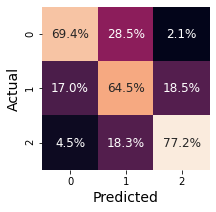

Macro F1 Scores: 
 Training: 0.746010714641487 
 Testing: 0.6904114382129497


In [15]:
baseline, y_train_pred_baseline, y_test_pred_baseline, f1_train_baseline, f1_test_baseline = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer())

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_baseline, f1_test_baseline))

# 1 - Other Vectorizers

TfidfVectorizer

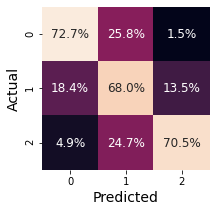

Macro F1 Scores: 
 Training: 0.7531043189409745 
 Testing: 0.6865719362640857


In [16]:
tfidf, y_train_pred_tfidf, y_test_pred_tfidf, f1_train_tfidf, f1_test_tfidf = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=TfidfVectorizer())

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_tfidf, f1_test_tfidf))

In [63]:
models.get_examples(X_test, y_test, y_test_pred_baseline, y_test_pred_tfidf, 2, 2, 1, 20)

[("There is beer. Can't complain.", 30),
 ('Great Shrimp dumpling noodle soup', 33),
 ('Good solid food, fairly priced and well presented', 49),
 ('Great food, service is a little slow but friendly', 49),
 ('Solid ramen good service.  Love the apps on special.', 52),
 ('Great food. Great selection of beers. TV game is lacking', 56),
 ('Nice little place with interesting food and beer selection', 58),
 ('Try the poutine topped with beef pot roast and cheese curds!', 60),
 ("Interesting flavours and less so on the sweet side. I'm a fan!", 62),
 ('Pricey, but so good. Great vibe. Rent the back room if you can.', 63),
 ('Pho is very good for the price, great place to eat on a budget.', 63),
 ('Really great food, decent service. No complaints in a great venue.', 66),
 ('A lip-smackin lunch..\nHouse special with truffle sauce - way to go.', 67),
 ("Delicious food but on some nights certain menu items aren't offered.", 68),
 ('Smoked Salmon Wrap with Capers for 6.50 cad tax included? Sweet de

In [0]:
ex = ["Try the poutine topped with beef pot roast and cheese curds!",
      "Try the poutine topped with chicken pot roast and cheese!"]

In [71]:
baseline.predict_proba(ex)

array([[0.00654886, 0.42000752, 0.57344362],
       [0.0108379 , 0.33863594, 0.65052616]])

In [66]:
models.nb_predict_proba(baseline.named_steps['vectorizer'],
                        baseline.named_steps['classifier'],
                        ex)

Log Priors: [-1.09861229 -1.09861229 -1.09861229]
Feature: and, Log Likelihoods: [-3.43521946 -3.43551455 -3.2730496 ]
Feature: beef, Log Likelihoods: [-7.23396523 -6.87116198 -6.8762868 ]
Feature: cheese, Log Likelihoods: [-7.17507261 -6.89023502 -6.83361106]
Feature: curds, Log Likelihoods: [-10.62947755 -10.06500261 -10.43522481]
Feature: pot, Log Likelihoods: [-9.33205158 -8.93030393 -9.00950804]
Feature: poutine, Log Likelihoods: [-8.64730389 -8.11572357 -8.19317693]
Feature: roast, Log Likelihoods: [-10.11865193  -9.68075846  -9.65186625]
Feature: the, Log Likelihoods: [-2.89549916 -2.83533217 -2.8645617 ]
Feature: topped, Log Likelihoods: [-9.8057796  -8.98761128 -8.66347778]
Feature: try, Log Likelihoods: [-6.90075617 -6.39169655 -6.19374714]
Feature: with, Log Likelihoods: [-4.85382803 -4.66328334 -4.56072633]


[0.006548859217022727, 0.4200075243802824, 0.5734436164026949]

In [73]:
for i, v in zip(baseline.named_steps['vectorizer'].get_feature_names(),
                baseline.named_steps['vectorizer'].transform(ex).toarray().transpose()):
  if np.any(v) > 0:
    print(i, v)

and [1 1]
beef [1 0]
cheese [1 1]
chicken [0 1]
curds [1 0]
pot [1 1]
poutine [1 1]
roast [1 1]
the [1 1]
topped [1 1]
try [1 1]
with [1 1]


In [74]:
tfidf.predict_proba(ex)

array([[0.12951044, 0.4556753 , 0.41481426],
       [0.12904444, 0.40837279, 0.46258277]])

In [77]:
models.nb_predict_proba(tfidf.named_steps['vectorizer'],
                        tfidf.named_steps['classifier'],
                        [ex[0]])

Log Priors: [-1.09861229 -1.09861229 -1.09861229]
Feature: and, Log Likelihoods: [-4.74002335 -4.73103229 -4.56208046]
Feature: beef, Log Likelihoods: [-7.30862457 -7.00044998 -7.03932616]
Feature: cheese, Log Likelihoods: [-7.31599338 -7.06307967 -7.04835176]
Feature: curds, Log Likelihoods: [-9.9957593  -9.54922691 -9.97285068]
Feature: pot, Log Likelihoods: [-9.07190785 -8.64474569 -8.7592631 ]
Feature: poutine, Log Likelihoods: [-8.29462129 -7.82348763 -7.87740213]
Feature: roast, Log Likelihoods: [-9.67749921 -9.24957645 -9.21256156]
Feature: the, Log Likelihoods: [-4.24098173 -4.1699875  -4.2271302 ]
Feature: topped, Log Likelihoods: [-9.68813676 -8.96774901 -8.70394956]
Feature: try, Log Likelihoods: [-7.21522409 -6.70242552 -6.4848539 ]
Feature: with, Log Likelihoods: [-5.82194274 -5.63410251 -5.57048863]


[0.010276626525246253, 0.4756694412114005, 0.5140539322633532]

Binary CountVectorizer

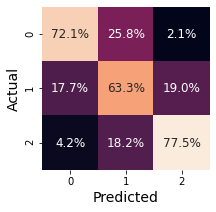

Macro F1 Scores: 
 Training: 0.7547603792120119 
 Testing: 0.6957043027181274


In [32]:
binary, y_train_pred_binary, y_test_pred_binary, f1_train_binary, f1_test_binary = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(binary=True))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_binary, f1_test_binary))

In [78]:
binary.predict_proba(ex)

array([[0.00786238, 0.35974568, 0.63239194],
       [0.01254773, 0.29157454, 0.69587772]])

# 2 - N-Grams

Unigram + Bigrams

In [0]:
bigrams, y_train_pred_bigrams, y_test_pred_bigrams, f1_train_bigrams, f1_test_bigrams = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(binary=True,
                                                 ngram_range=(1,2)))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_bigrams, f1_test_bigrams))

In [0]:
models.get_examples(X_test, y_test, y_test_pred_baseline, y_test_pred_bigrams, 0, 2, 0, 10)

In [0]:
ex = ["Food wasn't great. My gnocchi was incredibly greasy. Would not recommend anyone coming here."]
# ex = ['the food is not good']

In [0]:
baseline.predict(ex)

In [0]:
baseline.predict_proba(ex)

In [0]:
models.nb_predict_proba(baseline.named_steps['vectorizer'],
                        baseline.named_steps['classifier'],
                        ex)

In [0]:
bigrams.predict(ex)

In [0]:
bigrams.predict_proba(ex)

In [0]:
models.nb_predict_proba(bigrams.named_steps['vectorizer'],
                        bigrams.named_steps['classifier'],
                        ex)

Unigram + Bigrams + Trigrams

In [0]:
trigrams, y_train_pred_trigrams, y_test_pred_trigrams, f1_train_trigrams, f1_test_trigrams = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(binary=True,
                                                 ngram_range=(1,3)))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_trigrams, f1_test_trigrams))

In [0]:
models.nb_predict_proba(trigrams.named_steps['vectorizer'],
                        trigrams.named_steps['classifier'],
                        ex)

# 2b - Remove Non-Words/Numbers

In [0]:
filtered, y_train_pred_filtered, y_test_pred_filtered, f1_train_filtered, f1_test_filtered = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(token_pattern = '[a-zA-Z0-9]+'))

In [0]:
print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_filtered, f1_test_filtered))

In [0]:
features_baseline = baseline.named_steps['vectorizer'].get_feature_names()

In [0]:
features_filtered = filtered.named_steps['vectorizer'].get_feature_names()

In [0]:
print("Baseline: {0}, Filtered: {1}".format(len(features_baseline), len(features_filtered)))

In [0]:
for f in features_baseline:
  if f not in features_filtered:
    print(f)

# 3 - Remove Stopwords/Infrequent Words

In [0]:
nltk.download('stopwords')

In [0]:
stopworded, y_train_pred_stopworded, y_test_pred_stopworded, f1_train_stopworded, f1_test_stopworded = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(binary=True,
                                                 ngram_range=(1,2),
                                                 stop_words=stopwords.words('english')))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_stopworded, f1_test_stopworded))

In [0]:
len(bigrams.named_steps['vectorizer'].get_feature_names())

In [0]:
len(stopworded.named_steps['vectorizer'].get_feature_names())

In [0]:
models.most_frequent_words(bigrams.named_steps['vectorizer'],
                           bigrams.named_steps['classifier'],
                           k=10)

In [0]:
models.most_frequent_words(stopworded.named_steps['vectorizer'],
                           stopworded.named_steps['classifier'],
                           k=10)

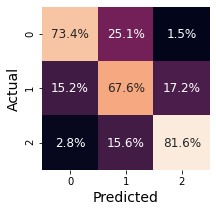

Macro F1 Scores: 
 Training: 0.8186231601246172 
 Testing: 0.7298454865430721


In [80]:
infrequented, y_train_pred_infrequented, y_test_pred_infrequented, f1_train_infrequented, f1_test_infrequented = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=CountVectorizer(binary=True,
                                                 ngram_range=(1,2),
                                                 min_df=6))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_infrequented, f1_test_infrequented))

In [0]:
len(bigrams.named_steps['vectorizer'].get_feature_names())

In [0]:
len(infrequented.named_steps['vectorizer'].get_feature_names())

# 4 - Normalization

Stemming

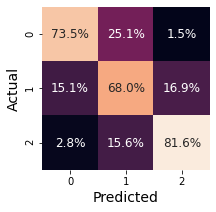

Macro F1 Scores: 
 Training: 0.8128707430432597 
 Testing: 0.7311361943743779


In [14]:
stemmed, y_train_pred_stemmed, y_test_pred_stemmed, f1_train_stemmed, f1_test_stemmed = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=features.YelpSentCountVectorizer(ngram_range=(1,2),
                                                                  remove_nonwords=False,
                                                                  remove_stopwords=False,
                                                                  stem=True,
                                                                  lemmatize=False,
                                                                  min_df=6,
                                                                  binary=True))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_stemmed, f1_test_stemmed))

In [0]:
example_words = ['what a trouble',
                 'this is very troubling',
                 'i am troubled']

In [0]:
stem_vec = features.YelpSentCountVectorizer(stem=True)
lemma_vec = features.YelpSentCountVectorizer(lemmatize=True)

In [0]:
example_stemmed = stem_vec.fit_transform(example_words)
example_lemmed = lemma_vec.fit_transform(example_words)

In [29]:
stem_vec.get_feature_names()

['a', 'am', 'i', 'is', 'thi', 'troubl', 'veri', 'what']

In [27]:
example_stemmed.toarray()

array([[1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 0]])

In [0]:
features_stemmed = stem_vec.get_feature_names()

words_stemmed = []
for sent in example_stemmed.toarray():
  words = []
  for i, w in enumerate(sent):
    if w > 0:
      words.append(features_stemmed[i])
  words_stemmed.append(' '.join(words))

In [33]:
words_stemmed

['a troubl what', 'is thi troubl veri', 'am i troubl']

In [0]:
features_lemmed = lemma_vec.get_feature_names()

words_lemmed = []
for sent in example_lemmed.toarray():
  words = []
  for i, w in enumerate(sent):
    if w > 0:
      words.append(features_lemmed[i])
  words_lemmed.append(' '.join(words))

In [35]:
words_lemmed

['a trouble what', 'be this troubling very', 'be i trouble']

Lemmatization

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

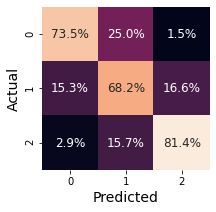

Macro F1 Scores: 
 Training: 0.8125273832216783 
 Testing: 0.7307698768443742


In [17]:
lemmatized, y_train_pred_lemmatized, y_test_pred_lemmatized, f1_train_lemmatized, f1_test_lemmatized = \
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      classifier=MultinomialNB(),
                      vectorizer=features.YelpSentCountVectorizer(ngram_range=(1,2),
                                                                  remove_nonwords=False,
                                                                  remove_stopwords=False,
                                                                  stem=False,
                                                                  lemmatize=True,
                                                                  min_df=6,
                                                                  binary=True))

print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train_lemmatized, f1_test_lemmatized))

# Conclusion

We should
- CountVectorizer, binarized
- Unigram + Bigram
- Min DF of 6
- Lemmatization

In [0]:
final_vectorizer = lemmatized.named_steps['vectorizer']

In [0]:
final_X_train_dtm = final_vectorizer.transform(X_train)
final_X_test_dtm = final_vectorizer.transform(X_test)

In [0]:
import pickle

In [0]:
with open('drive/My Drive/yelp_sentiment_analysis/pickles/vectorizer.pickle', 'wb') as f:
  pickle.dump(final_vectorizer, f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_train_dtm.pickle', 'wb') as f:
  pickle.dump(final_X_train_dtm, f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_test_dtm.pickle', 'wb') as f:
  pickle.dump(final_X_test_dtm, f)

In [0]:
with open('drive/My Drive/yelp_sentiment_analysis/pickles/vectorizer.pickle', 'rb') as f:
    final_vectorizer = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_train_dtm.pickle', 'rb') as f:
    final_X_train_dtm = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_test_dtm.pickle', 'rb') as f:
    final_X_test_dtm = pickle.load(f)